# Data Visualization with Python · Automobile Sales

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 01/03/2024

### Context

A data team is tasked with creating plots which answer questions for analysing automobile sales data to understand the historical trends in automobile sales during various recession periods:<br>
<br>
Recession period 1 - Year 1980 <br>
Recession period 2 - Year 1981 to 1982<br>
Recession period 3 - Year 1991<br>
Recession period 4 - Year 2000 to 2001<br>
Recession period 5 - Year end 2007 to mid 2009<br>
Recession period 6 - Year 2020 - Feb to April (Covid-19 Impact)<br>

### Data

The `historical_automobile_sales` dataset contains data representing automobile sales and related variables during recession and non-recession periods.

### Execution

Imported required libraries and packages.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Loaded the dataset.

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

df = pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


---

**Task:** Develop a Line chart to show how automobile sales fluctuate from year to year. Include ticks on x-axis with all the years and annotation for recession years 1991 and 2001.

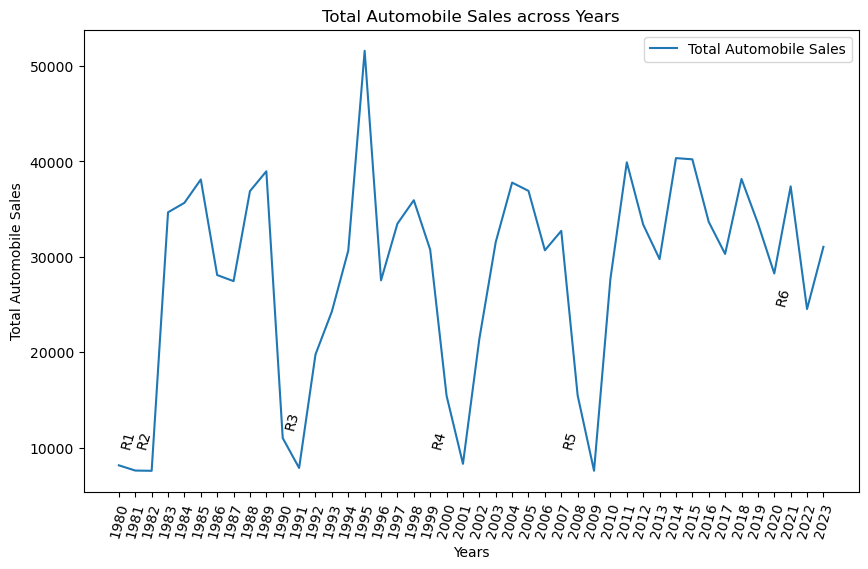

In [4]:
sales = df.groupby('Year')['Automobile_Sales'].sum()

sales.plot(kind='line', figsize=(10,6))
plt.title('Total Automobile Sales across Years')
plt.xlabel('Years')
plt.ylabel('Total Automobile Sales')

plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1980,10000,'R1',rotation = 75)
plt.text(1981,10000,'R2',rotation = 75)
plt.text(1990,12000,'R3',rotation = 75)
plt.text(1999,10000,'R4',rotation = 75)
plt.text(2007,10000,'R5',rotation = 75)
plt.text(2020,25000,'R6',rotation = 75)
plt.legend(['Total Automobile Sales'])

plt.show()

---

**Task:** Plot different lines for categories of vehicle type and analyse the trend to answer the question: Is there a noticeable difference in sales trends between different vehicle types during recession periods?

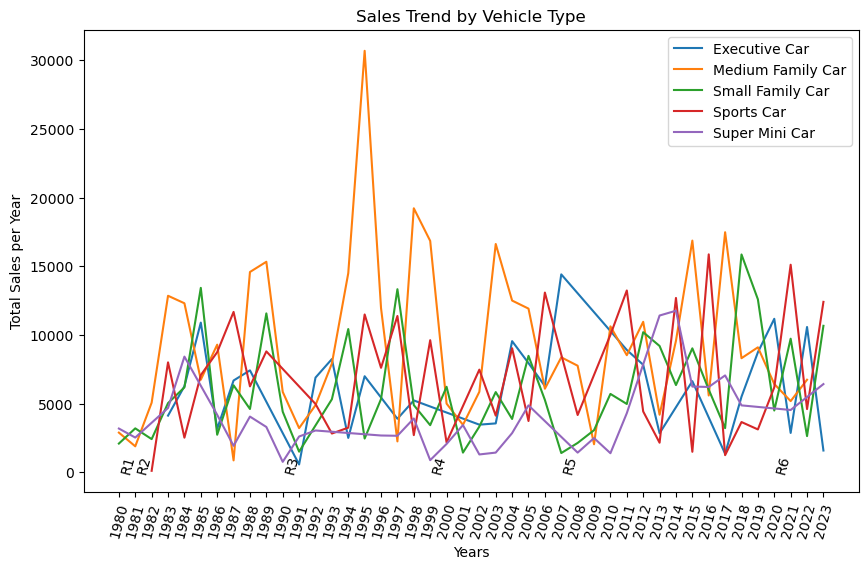

In [5]:
veh_type_sales = df.groupby(['Year','Vehicle_Type'], as_index = False)['Automobile_Sales'].sum()
veh_type_sales.set_index('Year', inplace = True)
veh_type_sales = veh_type_sales.groupby(['Vehicle_Type'])['Automobile_Sales']

veh_type_sales.plot(kind='line', figsize=(10,6))
plt.title('Sales Trend by Vehicle Type')
plt.xlabel('Years')
plt.ylabel('Total Sales per Year')

plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1980,0,'R1',rotation = 75)
plt.text(1981,0,'R2',rotation = 75)
plt.text(1990,0,'R3',rotation = 75)
plt.text(1999,0,'R4',rotation = 75)
plt.text(2007,0,'R5',rotation = 75)
plt.text(2020,0,'R6',rotation = 75)
plt.legend(['Executive Car', 'Medium Family Car', 'Small Family Car', 'Sports Car', 'Super Mini Car'])

plt.show()

**Observation:** From this plot we can see that, during recession periods, the sales for «Sports Car» vehicles declined (probably, because of the high cost), while sales of the «Super Mini Cars» and «Small Family Cars» increased.

---

**Task:** Create a visualization to compare the sales trend per vehicle type for recession periods versus for non-recession periods.

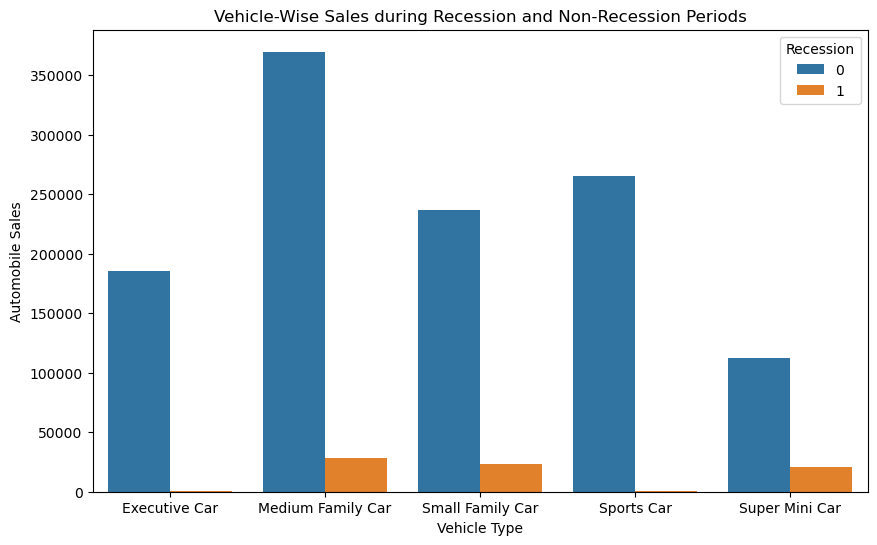

In [6]:
bar_chart_data = df.groupby(['Vehicle_Type','Recession'], as_index = False)['Automobile_Sales'].sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = 'Vehicle_Type', y = 'Automobile_Sales', hue = 'Recession', data = bar_chart_data)
ax.set_xticklabels(['Executive Car', 'Medium Family Car', 'Small Family Car', 'Sports Car', 'Super Mini Car'])
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Periods')
plt.xlabel('Vehicle Type')
plt.ylabel('Automobile Sales')

plt.show()

**Observation:** From this plot we can understand that there is a dramatic decline in the overall sales of the automobiles during recession. At the same time, the most affected types of vehicles are «Executive Сar» and «Sports Car».

---

**Task:** Compare the variations in GDP during recession and non-recession periods by developing a line plot for each period.

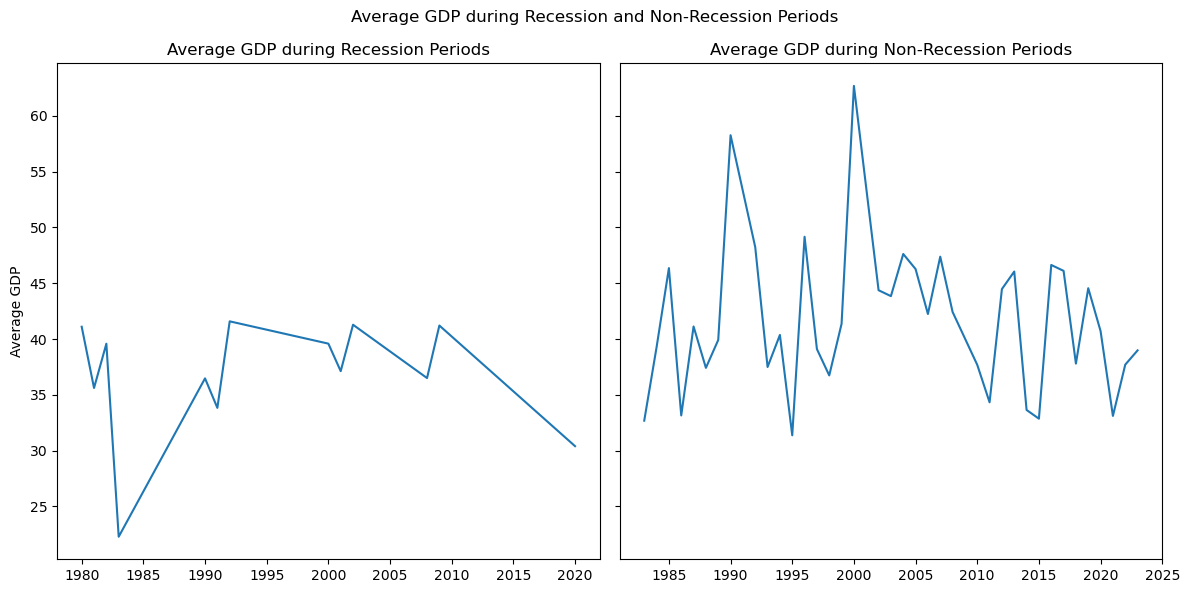

In [7]:
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

gdp_recession_data = recession_data.groupby('Year')['GDP'].mean()
gdp_non_recession_data = non_recession_data.groupby('Year')['GDP'].mean()

fig, ax = plt.subplots(1, 2, sharey = True, figsize=(12,6))

ax[0].plot(gdp_recession_data.index, gdp_recession_data.values)
ax[0].set_title('Average GDP during Recession Periods')

ax[1].plot(gdp_non_recession_data.index, gdp_non_recession_data.values)
ax[1].set_title('Average GDP during Non-Recession Periods')

ax[0].set_ylabel('Average GDP')

fig.suptitle('Average GDP during Recession and Non-Recession Periods')

fig.tight_layout()

plt.show()

**Observation:** From this plot it is evident that during recessions the GDP of the country was in a lower ranges.

---

**Task:** Display the impact of seasonality on Automobile Sales during non-recession periods: in particular, by showing average Automobile Sales for every month representing its Seasonality Weight as well.

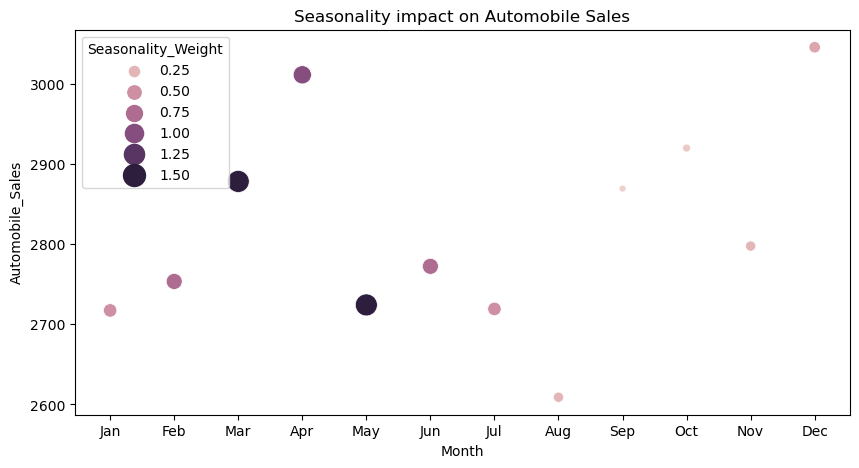

In [8]:
bubble_data = non_recession_data.copy()

bubble_data['Month Order'] = bubble_data['Month'].map({'Jan' : 1, 'Feb' : 2, 'Mar' : 3,
                                                            'Apr' : 4, 'May' : 5, 'Jun' : 6,
                                                            'Jul' : 7, 'Aug' : 8, 'Sep' : 9,
                                                            'Oct' : 10, 'Nov' : 11, 'Dec' : 12})

bubble_data = bubble_data.groupby(['Month Order', 'Month', 'Seasonality_Weight'], 
                    as_index = False)['Automobile_Sales'].mean()

plt.figure(figsize = (10,5))

sns.scatterplot(data = bubble_data, x = 'Month Order', y = 'Automobile_Sales', 
                size = 'Seasonality_Weight', hue = 'Seasonality_Weight', sizes = (25,250))
    
plt.xticks(ticks = bubble_data['Month Order'], labels = bubble_data['Month'])

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

**Observation:** From this plot it is evident that seasonality has no clear effect on average sales, since «lighter» months have higher sales and vice versa. For example, the «neutral» month of April (having 1.0 Seasonality Weight) is number 2 in the list of the most profitable months. While December with just 0.5 Seasonality Weight is the champion in average sales.

---

**Task:** Develop a plot to identify if there is a correlation between Consumer Confidence and Automobile Sales during recession periods.

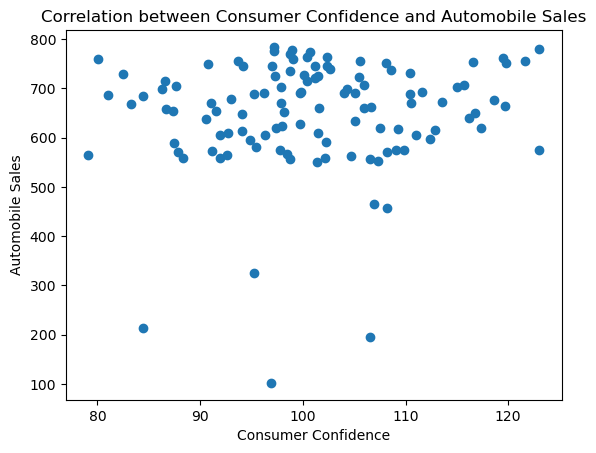

In [9]:
plt.scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Correlation between Consumer Confidence and Automobile Sales')

plt.show()

**Observation:** No direct correlation is visible between the variables. Any level of Consumer Confidence corresponds to nearly the same range of Automobile Sales.

---

**Task:** Identify the correlation between average Vehicle Price and the Sales volume during recessions.

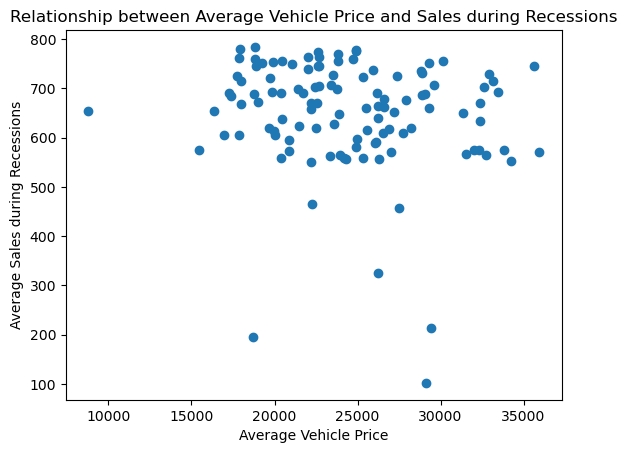

In [10]:
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])
    
plt.xlabel('Average Vehicle Price')
plt.ylabel('Average Sales during Recessions')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

**Observation:** Again, there is not much relation between the variables. The cheapest cars show the same sales volumes as the most expensive ones.

----


**Task:** Create a chart to display the portions total Advertising Expenditures during recession versus non-recession periods.

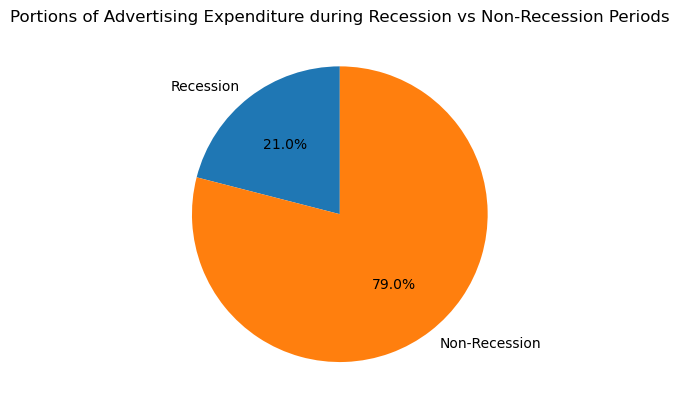

In [11]:
recession_adv_exp = recession_data['Advertising_Expenditure'].sum()
non_recession_adv_exp = non_recession_data['Advertising_Expenditure'].sum()

plt.pie([recession_adv_exp, non_recession_adv_exp], 
        labels = ['Recession', 'Non-Recession'], autopct = '%1.1f%%', startangle = 90)

plt.title('Portions of Advertising Expenditure during Recession vs Non-Recession Periods')

plt.show()

**Observation:** It looks like the company has been spending much more on the advertisements during non-recession periods as compared to during recession times.

---


**Task:** Develop a chart to display the total Advertisement Expenditures for each vehicle type during recession periods.

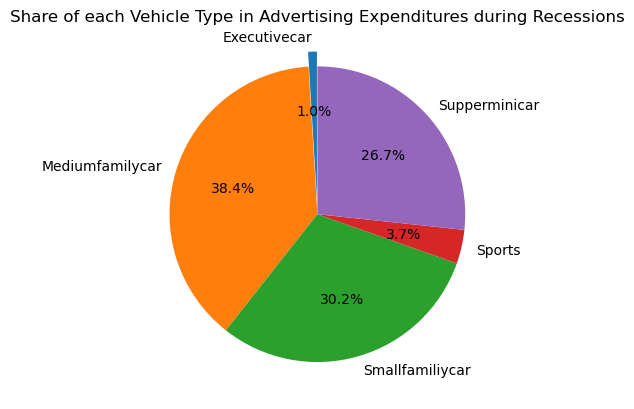

In [12]:
recession_veh_exp = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.pie(recession_veh_exp.values, labels = recession_veh_exp.index, autopct = '%1.1f%%', 
        startangle = 90, explode = [0.1,0,0,0,0])

plt.title('Share of each Vehicle Type in Advertising Expenditures during Recessions')

plt.show()

**Observation:** As seen from the chart, during recession periods the advertisements were mostly focused on lower price range vehicles: super mini, small and medium family cars.

----


**Task:** Develop a plot to analyse the effect of the Unemployment Rate on Vehicle Type and Sales during recession periods.

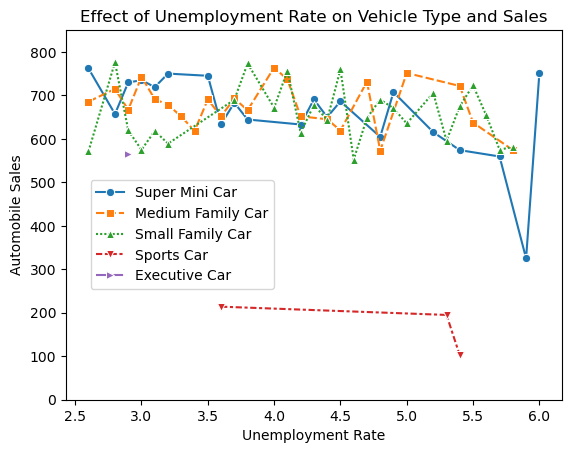

In [13]:
sns.lineplot(data = recession_data, x = 'unemployment_rate', y = 'Automobile_Sales',
hue = 'Vehicle_Type', style = 'Vehicle_Type', markers = ['o','s', '^','v', '>'], err_style = None)

plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylim(0, 850)
plt.legend(['Super Mini Car', 'Medium Family Car', 'Small Family Car', 'Sports Car', 'Executive Car'],
           loc = (0.05, .3))

plt.show()

**Observation:** During recession periods, with respect to Unemployment Rate increase, the buying pattern has clearly decreased for lower range vehicle types, especially for Super Mini cars.

---


**Task:** Create a map illustrating regions (states) with the hightest Sales volumes during recession periods.


A link for GeoJSON file is provided for this task as following:

In [14]:
states = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

In [15]:
sales_by_states = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

world_map = folium.Map(location = [37.0902, -95.7129], zoom_start = 4)

choropleth = folium.Choropleth(geo_data = states, 
                     data = sales_by_states,
                     columns = ['City', 'Automobile_Sales'],
                     key_on = 'feature.properties.name',
                     fill_color='YlOrRd',
                     fill_opacity=0.5,
                     line_opacity=0.2,
                     legend_name='Automobile Sales during Recession periods').add_to(world_map)

world_map

**Observation:** New York and California lead the way, with Illinois and Georgia taking silver.

### Acknowledgment

I would like to express gratitude to IBM and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of IBM Data Analyst Professional Certificate on Coursera.

Copyright © 2023 IBM Corporation. All rights reserved.